**Download MSVA-multiple in kaggle**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vincemarcs/mvsamultiple")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1


In [2]:
import os

# Path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1'

# List files in the dataset folder
files = os.listdir(dataset_path)
print("Files in the dataset folder:", files)


Files in the dataset folder: ['MVSA']


**convert image and text files to DF**

In [25]:
import pandas as pd
import os

# Path to the dataset
data_folder = '/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1/MVSA/data'

# Prepare a list to store image-text pair data
data = []

# Iterate through files in the folder
for file in os.listdir(data_folder):
    # Check if it's a text file
    if file.endswith('.txt'):
        # Get the corresponding image file
        image_file = file.replace('.txt', '.jpg')
        text_file_path = os.path.join(data_folder, file)
        image_file_path = os.path.join(data_folder, image_file)

        # Read the text content
        with open(text_file_path, 'r') as f:
            text_content = f.read().strip()

        # Add to the data list
        data.append({
            'image_path': image_file_path,
            'text': text_content
        })

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())


                                          image_path  \
0  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
1  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
2  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
3  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
4  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   

                                                text  
0  Guess what time it is: #SmileCookie supporting...  
1  Finally got wifi. Here's a drawing for all of ...  
2  #RebelHeartTour kicks off tomorrow night! RANK...  
3  Can you recommend anyone for this #Nursing #jo...  
4  Cool #art .@HuffPostSports Exclsv Gatorade unv...  


In [26]:
df

image_path  \
0      /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
1      /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
2      /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
3      /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
4      /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
...                                                  ...   
19595  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
19596  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
19597  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
19598  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
19599  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   

                                                    text  
0      Guess what time it is: #SmileCookie supporting...  
1      Finally got wifi. Here's a drawing for all of ...  
2      #RebelHeartTour kicks off tomorrow night! RANK...  
3      Can you recommend anyone for this #Nursing #jo...  
4      Cool #art .@HuffPostSports Exclsv Gatorade unv...  
...                                                  ...  
19595           Sad day for the McNitt house @tessmcnitt  
19596  When you realize @5SOS will never notice you #...  
19597  Sometimes our Laser Technicians like their job...  
19598  Best part of #NationalDogDay http://t.co/82akq...  
19599  Add excitement to your golf tournament with co...  

[19600 rows x 2 columns]

 **create DF label and combination by image,text DF**

In [27]:

with open('/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1/MVSA/labelResultAll.txt', 'r') as file:
    # Read the entire content of the file
    content = file.read()

lines = content.split("\n")

# Split the first line into column names
columns = lines[0].split("\t")

# Split the remaining lines into data rows
rows = [line.split("\t") for line in lines[1:]]

# Create the DataFrame
label_df= pd.DataFrame(rows, columns=columns)
label_df = label_df.iloc[:-1]
label_df = label_df.iloc[:, :2]

label_df

ID         text,image
0       2499  positive,positive
1       2500   neutral,positive
2       2501  negative,negative
3       2502  positive,positive
4       2503   positive,neutral
...      ...                ...
19595  22887  positive,positive
19596  22888  positive,positive
19597  22889  positive,positive
19598  22890  negative,negative
19599  22891  positive,positive

[19600 rows x 2 columns]

In [28]:
import re

combined_df=[]
for i in range(len(df["image_path"])):
  print(i)
  path=df["image_path"][i]
  match = re.search(r"(\d+)\.jpg", path)
  extracted_id = int(match.group(1))
  for j in range(len(label_df["ID"])):
    if extracted_id==int(label_df["ID"][j]):
      combined_df.append({"ID":label_df["ID"][j],"image_path":df["image_path"][i],"text":df["text"][i],"text,image":label_df["text,image"][j]})
      break
combined_df=pd.DataFrame(combined_df)

Streaming output truncated to the last 5000 lines.
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
1

In [29]:
combined_df

ID                                         image_path  \
0      19712  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
1      22605  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
2      13668  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
3       4558  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
4      14543  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
...      ...                                                ...   
19595  21915  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
19596   8653  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
19597  11288  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
19598   8458  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
19599  10775  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   

                                                    text         text,image  
0      Guess what time it is: #SmileCookie supporting...  positive,positive  
1      Finally got wifi. Here's a drawing for all of ...    neutral,neutral  
2      #RebelHeartTour kicks off tomorrow night! RANK...  positive,positive  
3      Can you recommend anyone for this #Nursing #jo...   neutral,positive  
4      Cool #art .@HuffPostSports Exclsv Gatorade unv...  positive,positive  
...                                                  ...                ...  
19595           Sad day for the McNitt house @tessmcnitt  negative,negative  
19596  When you realize @5SOS will never notice you #...   neutral,negative  
19597  Sometimes our Laser Technicians like their job...  positive,positive  
19598  Best part of #NationalDogDay http://t.co/82akq...  positive,positive  
19599  Add excitement to your golf tournament with co...   neutral,positive  

[19600 rows x 4 columns]

In [33]:
import pandas as pd

# Assuming your DataFrame is named df
combined_df.to_csv("combined_df.csv", index=False)

In [52]:
import pandas as pd
combined_df=pd.read_csv("combined_df.csv")

**Number label with these rules**


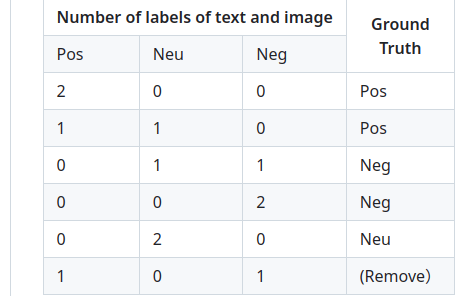

In [53]:
import pandas as pd

# Example DataFrame



# Function to count labels and determine Ground Truth
def determine_ground_truth(row):
    # Split the 'text,image' column into individual labels
    labels = row["text,image"].split(',')
    pos_count = labels.count("positive")
    neu_count = labels.count("neutral")
    neg_count = labels.count("negative")

    # Apply rules
    if pos_count == 2 and neu_count == 0 and neg_count == 0:
        return "Pos"
    elif pos_count == 1 and neu_count == 1 and neg_count == 0:
        return "Pos"
    elif pos_count == 0 and neu_count == 1 and neg_count == 1:
        return "Neg"
    elif pos_count == 0 and neu_count == 0 and neg_count == 2:
        return "Neg"
    elif pos_count == 0 and neu_count == 2 and neg_count == 0:
        return "Neu"
    elif pos_count == 1 and neu_count == 0 and neg_count == 1:
        return "Remove"
    else:
        return None  # For unexpected cases

# Apply the function to create a new "Ground Truth" column
combined_df["Ground Truth"] = combined_df.apply(determine_ground_truth, axis=1)

# Remove rows marked as "Remove"
df = combined_df[combined_df["Ground Truth"] != "Remove"]

# Reset index after removal
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
df


ID                                         image_path  \
0      19712  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
1      22605  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
2      13668  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
3       4558  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
4      14543  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
...      ...                                                ...   
18884  21915  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18885   8653  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18886  11288  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18887   8458  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18888  10775  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   

                                                    text         text,image  \
0      Guess what time it is: #SmileCookie supporting...  positive,positive   
1      Finally got wifi. Here's a drawing for all of ...    neutral,neutral   
2      #RebelHeartTour kicks off tomorrow night! RANK...  positive,positive   
3      Can you recommend anyone for this #Nursing #jo...   neutral,positive   
4      Cool #art .@HuffPostSports Exclsv Gatorade unv...  positive,positive   
...                                                  ...                ...   
18884           Sad day for the McNitt house @tessmcnitt  negative,negative   
18885  When you realize @5SOS will never notice you #...   neutral,negative   
18886  Sometimes our Laser Technicians like their job...  positive,positive   
18887  Best part of #NationalDogDay http://t.co/82akq...  positive,positive   
18888  Add excitement to your golf tournament with co...   neutral,positive   

      Ground Truth  
0              Pos  
1              Neu  
2              Pos  
3              Pos  
4              Pos  
...            ...  
18884          Neg  
18885          Neg  
18886          Pos  
18887          Pos  
18888          Pos  

[18889 rows x 5 columns]

<ipython-input-54-7c475417e7a4>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby("Ground Truth").apply(lambda x: x.sample(min(len(x), sample_size), random_state=42)).reset_index(drop=True)


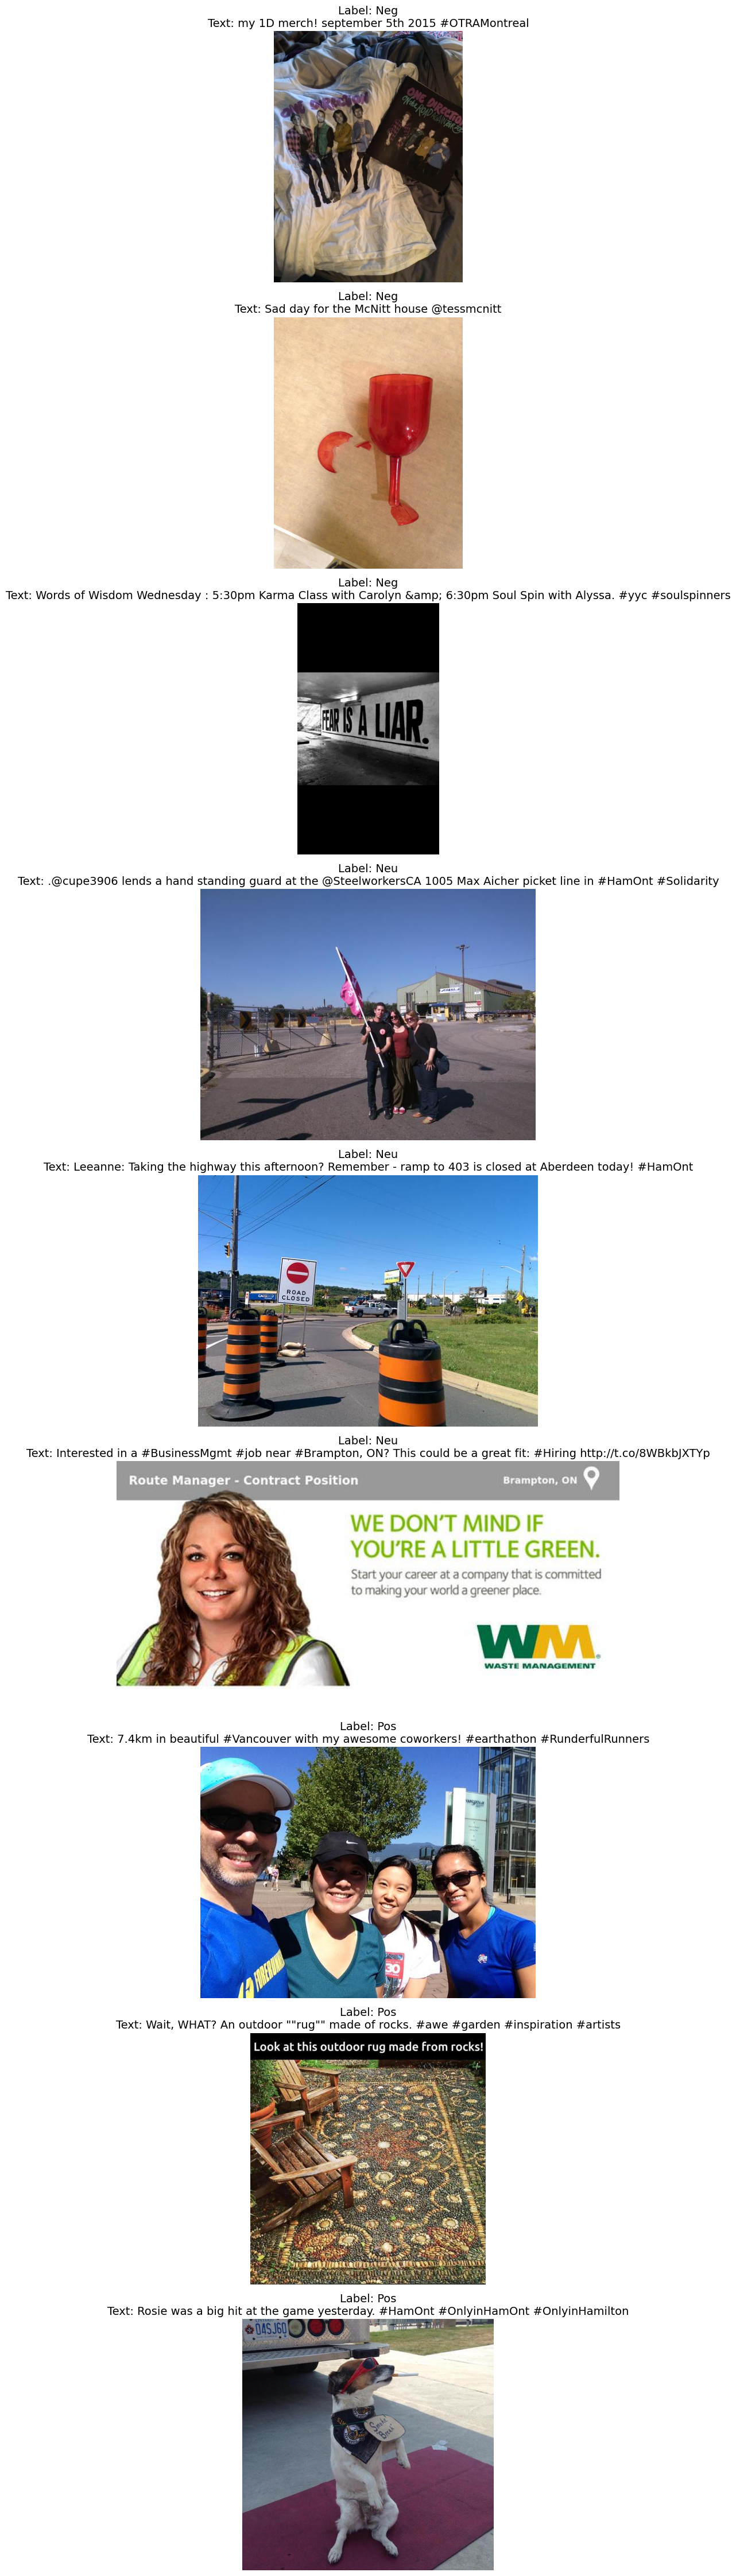

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define sample size per label
sample_size = 3  # Adjust as needed

# Sample data by label
sampled_df = df.groupby("Ground Truth").apply(lambda x: x.sample(min(len(x), sample_size), random_state=42)).reset_index(drop=True)

# Plot images and text
fig, axes = plt.subplots(len(sampled_df), 1, figsize=(10, 5 * len(sampled_df)))

for idx, row in sampled_df.iterrows():
    image_path = row["image_path"]
    text = row["text"]
    label = row["Ground Truth"]

    # Load image using PIL
    if os.path.exists(image_path):
        img = Image.open(image_path)
    else:
        img = None

    # Display image
    ax = axes[idx] if len(sampled_df) > 1 else axes
    if img:
        ax.imshow(img)
    else:
        ax.text(0.5, 0.5, "Image Not Found", fontsize=12, ha='center', va='center')

    ax.set_title(f"Label: {label}\nText: {text}", fontsize=14)
    ax.axis("off")  # Hide axis

plt.tight_layout()
plt.show()


In [55]:
# Map Ground Truth labels to numeric values
df["label"] = df["Ground Truth"].map({"Pos": 2, "Neu":1 ,"Neg":0})
df = df[df['image_path'] != '/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1/MVSA/data/3910.jpg']
df = df[df['image_path'] != '/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1/MVSA/data/5995.jpg']
df = df[df['image_path'] != '/root/.cache/kagglehub/datasets/vincemarcs/mvsamultiple/versions/1/MVSA/data/3151.jpg']
# Display the updated DataFrame
df


<ipython-input-55-e1f9cbffdcd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["Ground Truth"].map({"Pos": 2, "Neu":1 ,"Neg":0})


ID                                         image_path  \
0      19712  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
1      22605  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
2      13668  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
3       4558  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
4      14543  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
...      ...                                                ...   
18884  21915  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18885   8653  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18886  11288  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18887   8458  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18888  10775  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   

                                                    text         text,image  \
0      Guess what time it is: #SmileCookie supporting...  positive,positive   
1      Finally got wifi. Here's a drawing for all of ...    neutral,neutral   
2      #RebelHeartTour kicks off tomorrow night! RANK...  positive,positive   
3      Can you recommend anyone for this #Nursing #jo...   neutral,positive   
4      Cool #art .@HuffPostSports Exclsv Gatorade unv...  positive,positive   
...                                                  ...                ...   
18884           Sad day for the McNitt house @tessmcnitt  negative,negative   
18885  When you realize @5SOS will never notice you #...   neutral,negative   
18886  Sometimes our Laser Technicians like their job...  positive,positive   
18887  Best part of #NationalDogDay http://t.co/82akq...  positive,positive   
18888  Add excitement to your golf tournament with co...   neutral,positive   

      Ground Truth  label  
0              Pos      2  
1              Neu      1  
2              Pos      2  
3              Pos      2  
4              Pos      2  
...            ...    ...  
18884          Neg      0  
18885          Neg      0  
18886          Pos      2  
18887          Pos      2  
18888          Pos      2  

[18886 rows x 6 columns]

In [9]:
pip install spacy


In [10]:
import spacy
import pandas as pd
import re

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    text = re.sub(r'\@w+|\#', '', text)

    # Create a spaCy doc object
    doc = nlp(text.lower())  # Convert text to lowercase and process it

    # Lemmatization and removing stopwords
    processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

    return processed_text

# Assuming df is your DataFrame
df["clean_text"] = df["text"].apply(preprocess_text_spacy)


In [11]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Load and resize image
    img = image.img_to_array(img)  # Convert to array
    img = img / 255.0  # Normalize pixel values
    return img

# Apply image preprocessing
df["processed_images"] = df["image_path"].apply(lambda x: preprocess_image(x))


OSError: image file is truncated (4 bytes not processed)

In [56]:
df

ID                                         image_path  \
0      19712  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
1      22605  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
2      13668  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
3       4558  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
4      14543  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
...      ...                                                ...   
18884  21915  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18885   8653  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18886  11288  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18887   8458  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   
18888  10775  /root/.cache/kagglehub/datasets/vincemarcs/mvs...   

                                                    text         text,image  \
0      Guess what time it is: #SmileCookie supporting...  positive,positive   
1      Finally got wifi. Here's a drawing for all of ...    neutral,neutral   
2      #RebelHeartTour kicks off tomorrow night! RANK...  positive,positive   
3      Can you recommend anyone for this #Nursing #jo...   neutral,positive   
4      Cool #art .@HuffPostSports Exclsv Gatorade unv...  positive,positive   
...                                                  ...                ...   
18884           Sad day for the McNitt house @tessmcnitt  negative,negative   
18885  When you realize @5SOS will never notice you #...   neutral,negative   
18886  Sometimes our Laser Technicians like their job...  positive,positive   
18887  Best part of #NationalDogDay http://t.co/82akq...  positive,positive   
18888  Add excitement to your golf tournament with co...   neutral,positive   

      Ground Truth  label  
0              Pos      2  
1              Neu      1  
2              Pos      2  
3              Pos      2  
4              Pos      2  
...            ...    ...  
18884          Neg      0  
18885          Neg      0  
18886          Pos      2  
18887          Pos      2  
18888          Pos      2  

[18886 rows x 6 columns]

**Download dependency**

In [13]:
pip install torch torchvision transformers openai-clip scikit-learn


**load CLIP modle**

In [14]:
import torch
import clip
from PIL import Image
import numpy as np
from sklearn.linear_model import LogisticRegression

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


**text Embedding functio**

In [15]:
def get_text_embedding(texts):
    """
    This function receives a list of texts and returns the CLIP text embeddings.
    """
    # Tokenize and encode text using CLIP
    text_tokens = clip.tokenize(texts).to(device)  # List of strings
    with torch.no_grad():  # Disable gradients for inference
        text_embeddings = model.encode_text(text_tokens)
    return text_embeddings.cpu().numpy()



**image Embedding function**

In [16]:
from PIL import ImageFile

# Allow loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

def get_image_embedding(image_path):
    # Open and preprocess the image
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_embedding = model.encode_image(image)
    return image_embedding.cpu().numpy()


**Embedding operations**

In [57]:
import pandas as pd
import numpy as np


# Extract texts and image paths
texts = df['text'].values
image_paths = df['image_path'].values
sentiments = df['label'].values  # Ground Truth label (1.0 for Positive, 0.0 for Negative)

# Extract text embeddings
text_embeddings = np.vstack([get_text_embedding([text]) for text in texts])

# Extract image embeddings


In [58]:
text_embeddings

array([[ 0.1714  , -0.2336  , -0.2394  , ...,  0.4167  ,  0.02853 ,
        -0.04874 ],
       [ 0.2747  , -0.0895  ,  0.02127 , ..., -0.5283  ,  0.3892  ,
        -0.3438  ],
       [ 0.1101  ,  0.12463 , -0.4478  , ...,  0.2844  ,  0.1897  ,
         0.2236  ],
       ...,
       [ 0.2612  , -0.0339  ,  0.005222, ...,  0.2413  ,  0.06384 ,
         0.10706 ],
       [ 0.01037 ,  0.1293  , -0.3728  , ..., -0.1826  , -0.04968 ,
         0.05075 ],
       [-0.3638  , -0.1785  , -0.1821  , ...,  0.71    , -0.218   ,
        -0.06134 ]], dtype=float16)

In [59]:
image_embeddings = np.vstack([get_image_embedding(image_path) for image_path in image_paths])

# Combine the embeddings (horizontal stacking)
combined_embeddings = np.hstack((text_embeddings, image_embeddings))


In [60]:
text_embeddings

array([[ 0.1714  , -0.2336  , -0.2394  , ...,  0.4167  ,  0.02853 ,
        -0.04874 ],
       [ 0.2747  , -0.0895  ,  0.02127 , ..., -0.5283  ,  0.3892  ,
        -0.3438  ],
       [ 0.1101  ,  0.12463 , -0.4478  , ...,  0.2844  ,  0.1897  ,
         0.2236  ],
       ...,
       [ 0.2612  , -0.0339  ,  0.005222, ...,  0.2413  ,  0.06384 ,
         0.10706 ],
       [ 0.01037 ,  0.1293  , -0.3728  , ..., -0.1826  , -0.04968 ,
         0.05075 ],
       [-0.3638  , -0.1785  , -0.1821  , ...,  0.71    , -0.218   ,
        -0.06134 ]], dtype=float16)

In [61]:
image_embeddings

array([[-0.217   , -0.10223 , -0.4268  , ...,  0.7188  ,  0.0986  ,
        -0.001862],
       [-0.4502  , -0.2339  , -0.26    , ...,  0.3772  ,  0.0481  ,
         0.2922  ],
       [-0.2338  ,  0.1217  ,  0.2274  , ..., -0.4644  , -0.05484 ,
        -0.121   ],
       ...,
       [ 0.04184 ,  0.11414 ,  0.2793  , ...,  0.545   ,  0.2062  ,
        -0.3142  ],
       [-0.1874  , -0.001522, -0.3086  , ...,  0.8647  ,  0.265   ,
         0.0299  ],
       [-1.204   , -0.02863 , -0.372   , ..., -0.286   ,  0.02946 ,
         0.151   ]], dtype=float16)

**create Embedding DF**

In [62]:
df_embedded=pd.DataFrame()
df_embedded['text_embedding']=list(text_embeddings)
df_embedded['image_embedding']=list(image_embeddings)
df_embedded['label']=sentiments

In [63]:
df_embedded

text_embedding  \
0      [0.1714, -0.2336, -0.2394, 0.472, -0.3323, -0....   
1      [0.2747, -0.0895, 0.02127, 0.03268, 0.02405, -...   
2      [0.1101, 0.12463, -0.4478, -0.2883, -0.0796, -...   
3      [0.1804, -0.2908, 0.337, 0.5625, -0.1255, 0.19...   
4      [-0.06177, -0.09595, 0.345, -0.05765, 0.319, 0...   
...                                                  ...   
18881  [0.02667, 0.11914, -0.2488, -0.03152, 0.01735,...   
18882  [0.02351, -0.0388, 0.03778, -0.3228, 0.2323, 0...   
18883  [0.2612, -0.0339, 0.005222, 0.05057, -0.4697, ...   
18884  [0.01037, 0.1293, -0.3728, 0.0597, 0.02007, 0....   
18885  [-0.3638, -0.1785, -0.1821, 0.2128, -0.1099, 0...   

                                         image_embedding  label  
0      [-0.217, -0.10223, -0.4268, 0.7603, 0.03217, -...      2  
1      [-0.4502, -0.2339, -0.26, -0.01996, 0.0276, -0...      1  
2      [-0.2338, 0.1217, 0.2274, 0.073, 0.2255, -0.56...      2  
3      [-0.3718, 0.318, -0.01381, 0.665, -0.3176, -0....      2  
4      [-0.3894, 0.2179, 0.2698, -0.0852, 0.422, 0.57...      2  
...                                                  ...    ...  
18881  [-0.258, 0.36, 0.05457, -0.2686, 0.3167, 0.174...      0  
18882  [-0.1611, -0.06976, -0.1804, 0.10535, -0.08124...      0  
18883  [0.04184, 0.11414, 0.2793, 0.2365, -0.2385, 0....      2  
18884  [-0.1874, -0.001522, -0.3086, 0.178, -0.08276,...      2  
18885  [-1.204, -0.02863, -0.372, 0.265, -0.606, 0.22...      2  

[18886 rows x 3 columns]

**save the Embedding to CSV file**

In [ ]:
# Save the DataFrame to a CSV file
df_embedded.to_csv('result_embeddings.csv', index=False)

print("File saved as 'result_embeddings.csv'")


File saved as 'result_embeddings.csv'


**import  dependency**

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import accuracy_score
from transformers import CLIPProcessor, CLIPModel


**Dataset Class**

In [65]:
class MultimodalDataset(Dataset):
    def __init__(self, text_embeddings, image_embeddings, labels):
        self.text_embeddings = torch.tensor(text_embeddings, dtype=torch.float32)
        self.image_embeddings = torch.tensor(image_embeddings, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.text_embeddings[idx], self.image_embeddings[idx], self.labels[idx]


**Model Definition**:



In [66]:
class MultimodalClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultimodalClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, text_embedding, image_embedding):
        combined = torch.cat((text_embedding, image_embedding), dim=-1)
        return self.fc(combined)


**Data Preparation**

In [67]:
def prepare_data(df_embedded):
    """
    Prepares the dataset for training and validation.
    Converts text embeddings, image embeddings, and labels into a usable format.
    """

    text_embeddings = [list(e) for e in df_embedded['text_embedding']]
    image_embeddings = [list(e) for e in df_embedded['image_embedding']]
    labels = df_embedded['label'].tolist()

    return text_embeddings, image_embeddings, labels


**Training Function**

In [86]:
result_accuray=[]
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=10):
    """
    Trains the model and evaluates it on the validation set at each epoch.
    """
    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        total_loss = 0
        all_preds = []
        all_labels = []

        for text_embed, image_embed, label in train_loader:
            text_embed, image_embed, label = text_embed.to(device), image_embed.to(device), label.to(device)

            # Forward Pass
            outputs = model(text_embed, image_embed)
            loss = criterion(outputs, label)

            # Backward Pass and Optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Collect Predictions for Accuracy
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(label.cpu().numpy())

        train_accuracy = accuracy_score(all_labels, all_preds)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.4f}")
        result_accuray.append({"Epoch":epoch+1,"Accuracy":train_accuracy,"Loss":total_loss/len(train_loader)})

        # Validation Phase
        model.eval()
        val_loss = 0
        val_preds = []
        val_labels = []

        with torch.no_grad():
            for text_embed, image_embed, label in val_loader:
                text_embed, image_embed, label = text_embed.to(device), image_embed.to(device), label.to(device)

                outputs = model(text_embed, image_embed)
                loss = criterion(outputs, label)
                val_loss += loss.item()

                preds = torch.argmax(outputs, dim=1).cpu().numpy()
                val_preds.extend(preds)
                val_labels.extend(label.cpu().numpy())

        val_accuracy = accuracy_score(val_labels, val_preds)
        print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return model


**Main Function**

In [87]:
def main():
    # Load Pretrained CLIP Model and Processor
    clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    # Prepare Data
    text_embeddings, image_embeddings, labels = prepare_data(df_embedded)

    # Create Dataset and Split
    dataset = MultimodalDataset(text_embeddings, image_embeddings, labels)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Model Initialization
    input_dim = len(text_embeddings[0]) + len(image_embeddings[0])  # Sum of embedding dimensions
    hidden_dim = 256
    output_dim = 3  # 3-class classification (Pos, Neu, Neg)

    model = MultimodalClassifier(input_dim, hidden_dim, output_dim)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Training Setup
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-3)

    # Train the Model
    trained_model = train_model(model, train_loader, val_loader, criterion, optimizer, device)

    # Save the Model
    torch.save(trained_model.state_dict(), "multimodal_classifier_3class.pth")

    # Load Trained Model for Inference
    trained_model.eval()  # Set the model to evaluation mode
    # display_sample_predictions(val_loader, trained_model, device)


In [88]:
if __name__ == "__main__":
    main()


Epoch [1/10], Loss: 0.8541, Accuracy: 0.6105
Validation Loss: 0.8237, Validation Accuracy: 0.6207
Epoch [2/10], Loss: 0.8070, Accuracy: 0.6334
Validation Loss: 0.8319, Validation Accuracy: 0.6204
Epoch [3/10], Loss: 0.7736, Accuracy: 0.6497
Validation Loss: 0.8556, Validation Accuracy: 0.5950
Epoch [4/10], Loss: 0.7189, Accuracy: 0.6799
Validation Loss: 0.8764, Validation Accuracy: 0.6053
Epoch [5/10], Loss: 0.6436, Accuracy: 0.7219
Validation Loss: 0.9313, Validation Accuracy: 0.6038
Epoch [6/10], Loss: 0.5604, Accuracy: 0.7682
Validation Loss: 0.9823, Validation Accuracy: 0.5717
Epoch [7/10], Loss: 0.4732, Accuracy: 0.8084
Validation Loss: 1.0495, Validation Accuracy: 0.5670
Epoch [8/10], Loss: 0.3976, Accuracy: 0.8425
Validation Loss: 1.1197, Validation Accuracy: 0.5757
Epoch [9/10], Loss: 0.3431, Accuracy: 0.8701
Validation Loss: 1.1528, Validation Accuracy: 0.5770
Epoch [10/10], Loss: 0.2950, Accuracy: 0.8901
Validation Loss: 1.2805, Validation Accuracy: 0.5588


In [89]:
df_result=pd.DataFrame(result_accuray)
df_result

Epoch  Accuracy      Loss
0      1  0.610537  0.854078
1      2  0.633439  0.806963
2      3  0.649722  0.773605
3      4  0.679905  0.718871
4      5  0.721935  0.643600
5      6  0.768202  0.560395
6      7  0.808380  0.473156
7      8  0.842468  0.397649
8      9  0.870135  0.343149
9     10  0.890124  0.295002